**KNN [k-Nearest Neighbours Model]**

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # kNN kullanabilmek icin import ediyoruz.

In [6]:
data=pd.read_csv("diabetes.csv") # read_csv ile yuklenmis olan csv yi okuttuk
data # gozlemlemek icin print ettik

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# Outcome 0 = Healthy
# Outcome 1 = Diabet

# data isimli dataframe'de Outcome 0 olan saglikli, 1 olan hasta demektir.
# data.Outcome derken filtering yapiyoruz
# Outcome 0 olanlari healthy_people adinda bir dataframe yap ve onun icine at
# Outcome 1 olanlari diabetic_patient adinda bir dataframe yap ve onun icine at
healthy_people = data[data.Outcome == 0]
diabetic_patient =data[data.Outcome == 1]

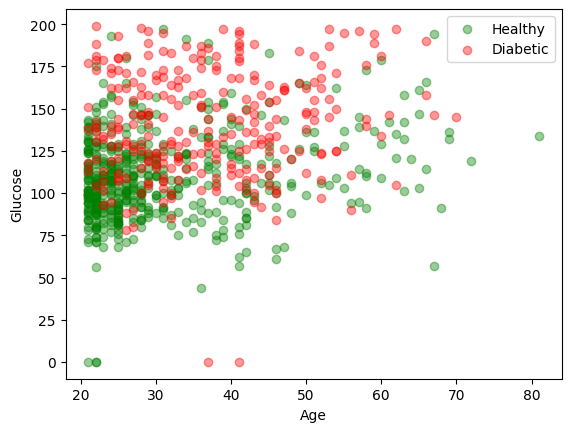

In [9]:
# Scatter means plot with using dots.
# For now, just want to make a few plots with using glucose.
# We accept the Age as x-line and Glucose as y-line.
# We colored green for healthy people, red for diabetic patient.
# Alpha means the intensity/transparency for the colors.

plt.scatter(healthy_people.Age, healthy_people.Glucose, color="green", label="Healthy", alpha=0.4)

plt.scatter(diabetic_patient.Age, diabetic_patient.Glucose, color="red", label="Diabetic", alpha=0.4)

plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [19]:
# veri setimi ikiye bolmem gerekiyor
# dolayısıyla x ve y eksenlerini belirleyebiliriz
# y degerim outcome values degerleri olacak, yani 0 mi 1 mi (hasta mi degil mi?)
y = data.Outcome.values
# x_before verisi ise tum datadan Outcome sutununun(dependent) cikartilmasiyla geriye kalan tum diger verilerdir(independent).
# cunku kNN algoritmasi x degerleri icinde gruplandirma yapacak.
x_before = data.drop(["Outcome"],axis=1)

x_before

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [24]:
# Normalization yapacagiz, neden?
# x_before icindeki degerleri sadece 0-1 arasinda olacak sekilde guncelliyoruz.
# eger bu sekilde normalization yapmazsak yuksek sayilar kucuk sayilari ezer, bu durum kNN algoritmasini yaniltabilir.
x=(x_before - np.min(x_before, axis=0)) / (np.max(x_before, axis=0) - np.min(x_before, axis=0))

# normalization oncesi verileri gozlemleyelim:
print("Normalization oncesi veriler:\n")
print(x_before)

print("\n\n\nNormalization sonrasi yapay zekaya egitim icin verilecek veriler:\n")
print(x)


Normalization oncesi veriler:

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1     

In [41]:
# train data ile test datayi ayiriyoruz.
# train data sistemin saglikli insan ile hasta insani ayirt etmesini ogrenmek icin kullanilacak.
# test data ise makina ogrenme modeli dogru bir sekilde hasta ve saglikli insanlari ayirt edebiliyor mu diye test etmek icin kullanilacak.
# python birden fazla degisken return edebildigi icin virgulle ayirarak esitligin soluna yaziyoruz.
# yukarida tanimladigimiz train_test_split kutuphanesinden yararlaniyoruz.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# test_size %20 demek, elimdeki tum modelimin (768 hasta olan dataset) %20'si test icin kullanilacak, %80'i train icin kullanilacak demektir.
# random_state True demek bu kayitlardan hangilerinin test hangilerinin train icin secilecegine random karar ver demek.


In [42]:
# kNN modelimizi olusturmaya baslayabiliriz. k=3 veriyoruz.
knn = KNeighborsClassifier(n_neighbors=3) # n_neighbors = k
# modelimizi train datalar ile egitiyoruz.
knn.fit(x_train, y_train)
# egittikten sonra modeli x_test uzerinde predict ettiriyoruz yani test islemini yapiyoruz.
prediction = knn.predict(x_test)
print("k=3 icin test verilerimizin dogrulama testi sonucu: ",knn.score(x_test, y_test))
# bu islem sonucunda basari oranimizi goruyoruz.

k=3 icin test verilerimizin dogrulama testi sonucu:  0.7857142857142857


In [43]:
# k kac olmali?
# en iyi k degerini belirleyelim...

i = 1
for k in range(1,11):
  knn_new = KNeighborsClassifier(n_neighbors=k)
  knn_new.fit(x_train, y_train)
  print("i =", i, "icin Dogruluk Orani: %", knn_new.score(x_test,y_test)*100)
  i+=1

i = 1 icin Dogruluk Orani: % 69.48051948051948
i = 2 icin Dogruluk Orani: % 74.02597402597402
i = 3 icin Dogruluk Orani: % 78.57142857142857
i = 4 icin Dogruluk Orani: % 75.97402597402598
i = 5 icin Dogruluk Orani: % 79.87012987012987
i = 6 icin Dogruluk Orani: % 79.22077922077922
i = 7 icin Dogruluk Orani: % 81.16883116883116
i = 8 icin Dogruluk Orani: % 79.22077922077922
i = 9 icin Dogruluk Orani: % 78.57142857142857
i = 10 icin Dogruluk Orani: % 79.22077922077922


test_size=0.2 iken K=7 degeri verildiginde en yüksek basari elde ediliyor. (%81.16)

test_size=0.1 iken K=3 degeri verildiginde en yüksek basari elde ediliyor. (%83.11)

